In [1]:
def mfreqz(b,a, Fs):
    ##Compute frequency response of the filter using signal.freqz function

     ### START CODE HERE ### (≈ 1 line of code) 

    wz, hz =signal.freqz(b,a)

    ##Calculate Magnitude from hz in dB

    Mag=20*np.log10(abs(hz)) ### START CODE HERE ### (≈ 1 line of code) 

    ##Calculate phase angle in degree from hz
    Phase =np.unwrap(np.arctan2(np.imag(hz), np.real(hz)))*(180/np.pi)### START CODE HERE ### (≈ 1 line of code) 

    ##Calculate frequency in Hz from wz
    Freq =wz*Fs/(2*np.pi) ### START CODE HERE ### (≈ 1 line of code) 

    ##Plot filter magnitude and phase responses using subplot. 
    fig = plt.figure(figsize=(10, 6))
    
    ##Plot Magnitude response
    sub1 = plt.subplot(2, 1, 1)
    sub1.plot(Freq,Mag, 'r', linewidth=2)  
    sub1.axis([1, Fs/2, -100, 5])
    sub1.set_title('Magnitute Response', fontsize=20)
    sub1.set_xlabel('Frequency [Hz]', fontsize=20)
    sub1.set_ylabel('Magnitude [dB]', fontsize=20)
    sub1.grid()

    ##Plot phase angle
    sub2 = plt.subplot(2, 1, 2)
    sub2.plot(Freq, Phase, 'g', linewidth=2)
    sub2.set_ylabel('Phase (degree)', fontsize=20)
    sub2.set_xlabel(r'Frequency (Hz)', fontsize=20)
    sub2.set_title(r'Phase response', fontsize=20)
    sub2.grid()

    plt.subplots_adjust(hspace=0.5)
    fig.tight_layout()
    plt.show()

In [5]:
##Define impz(b,a) to calculate impulse response and step response of a system
##input: b= an array containing numerator coefficients,a= an array containing denominator coefficients
def impz(b,a):
    ##Define the impulse sequence of length 60
    impulse = np.repeat(0.,60)
    impulse[0] =1.
    x = np.arange(0,60)

    ##Compute the impulse response 
    response =signal.lfilter(b, a, impulse)### START CODE HERE ### (≈ 1 line of code)  

    ##Plot filter impulse and step response: 
    fig = plt.figure(figsize=(10, 6))
    plt.subplot(211)
    plt.stem(x, response, 'm',use_line_collection=True)
    plt.ylabel('Amplitude', fontsize=15)
    plt.xlabel(r'n (samples)', fontsize=15)
    plt.title(r'Impulse response', fontsize=15)
    
    plt.subplot(212)
    step = np.cumsum(response)    ##Compute step response of the system
    plt.stem(x, step, 'g',use_line_collection=True)
    plt.ylabel('Amplitude', fontsize=15)
    plt.xlabel(r'n (samples)', fontsize=15)
    plt.title(r'Step response', fontsize=15)
    plt.subplots_adjust(hspace=0.5)
    
    fig.tight_layout()
    plt.show()

In [4]:
##import required library
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

In [13]:
##Given specification
Fs=7000                                            ##Sampling frequency in Hz
fp=np.array([1400,2100])     ##Pass band frequency in Hz
fs=np.array([1050,2450])    ##Stop band frequency in Hz
Ap=0.4     ##Pass band ripple in dB

In [14]:
##Compute pass band and stop band edge frequencies
wp=fp/(Fs/2)### START CODE HERE ### (≈ 1 line of code)     ##Normalized passband edge frequencies w.r.t. Nyquist rate
ws=fs/(Fs/2)### START CODE HERE ### (≈ 1 line of code)     ##Normalized stopband edge frequencies


In [15]:
##Compute Butterworth filter order and cutoff frequency
N, wc=signal.buttord(wp, ws, Ap, As, analog=True)### START CODE HERE ### (≈ 1 line of code) 

##Print the values of order and cut-off frequency
print('Order of the filter=', N)
print('Cut-off frequency=', wc)

Order of the filter= 6
Cut-off frequency= [0.38322818 0.62625875]


In [16]:
z, p=signal.butter(N, wc, 'bandpass') 

In [17]:

##Print numerator and denomerator coefficients of the filter
print('Numerator Coefficients:', z)
print('Denominator Coefficients:', p)

Numerator Coefficients: [ 0.00091314  0.         -0.00547886  0.          0.01369714  0.
 -0.01826286  0.          0.01369714  0.         -0.00547886  0.
  0.00091314]
Denominator Coefficients: [1.         0.14551471 3.07109422 0.38521126 4.34972636 0.44551645
 3.4817303  0.2720539  1.6397861  0.08664779 0.42653968 0.01141621
 0.0475961 ]


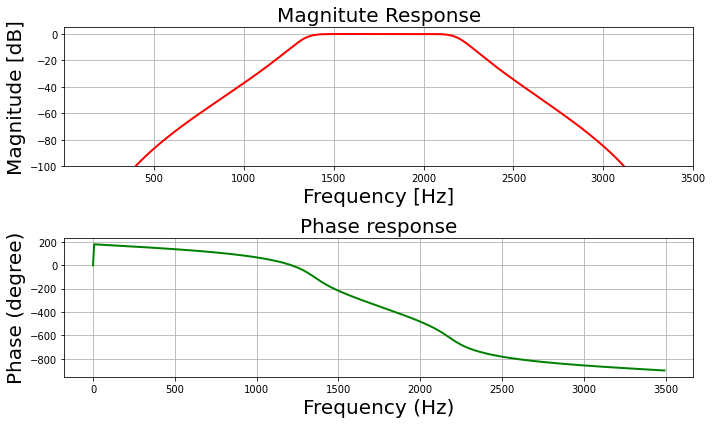

In [18]:
mfreqz(z,p,Fs)

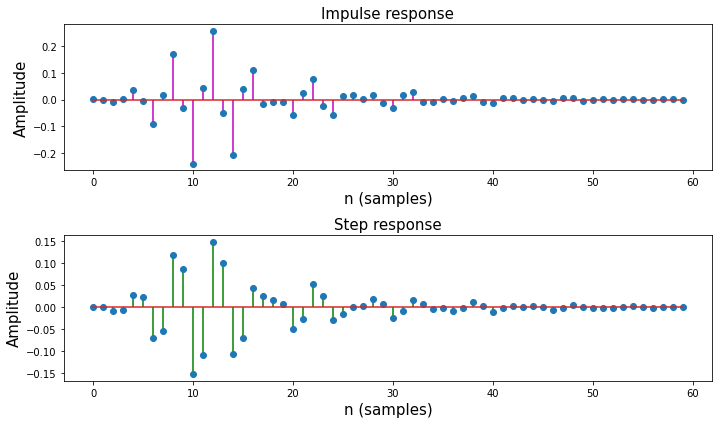

In [19]:
impz(z,p)